In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [7]:
data = pd.read_csv(r'C:\Users\Acer\OneDrive\Desktop\Python_Diwali_Sales_Analysis\Diwali Sales Data.csv', encoding='ISO-8859-1')

In [9]:
data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [12]:
data.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [13]:
data.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [16]:
round(data.isnull().sum()/len(data)*100,2)

User_ID               0.00
Cust_name             0.00
Product_ID            0.00
Gender                0.00
Age Group             0.00
Age                   0.00
Marital_Status        0.00
State                 0.00
Zone                  0.00
Occupation            0.00
Product_Category      0.00
Orders                0.00
Amount                0.11
Status              100.00
unnamed1            100.00
dtype: float64

In [20]:
data.drop('Status',axis=1,inplace=True)

In [22]:
data.drop('unnamed1',axis=1,inplace=True)

In [25]:
round(data.isnull().sum()/len(data)*100,2)

User_ID             0.0
Cust_name           0.0
Product_ID          0.0
Gender              0.0
Age Group           0.0
Age                 0.0
Marital_Status      0.0
State               0.0
Zone                0.0
Occupation          0.0
Product_Category    0.0
Orders              0.0
Amount              0.0
dtype: float64

In [24]:
data.dropna(inplace=True)

In [27]:
data.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [28]:
data['Amount'].dtype

dtype('float64')

In [32]:
data['Amount']=data['Amount'].astype('int')

In [33]:
data['Amount'].dtype

dtype('int32')

In [37]:
data[['Age','Amount','Orders']].describe()

,Age,Amount,Orders
count,11239.000000,11239.000000,11239.000000
mean,35.410357,9453.610553,2.489634
std,12.753866,5222.355168,1.114967
min,12.000000,188.000000,1.000000
25%,27.000000,5443.000000,2.000000
50%,33.000000,8109.000000,2.000000
75%,43.000000,12675.000000,3.000000
max,92.000000,23952.000000,4.000000


# Exploratory Data Analysis

## Gender

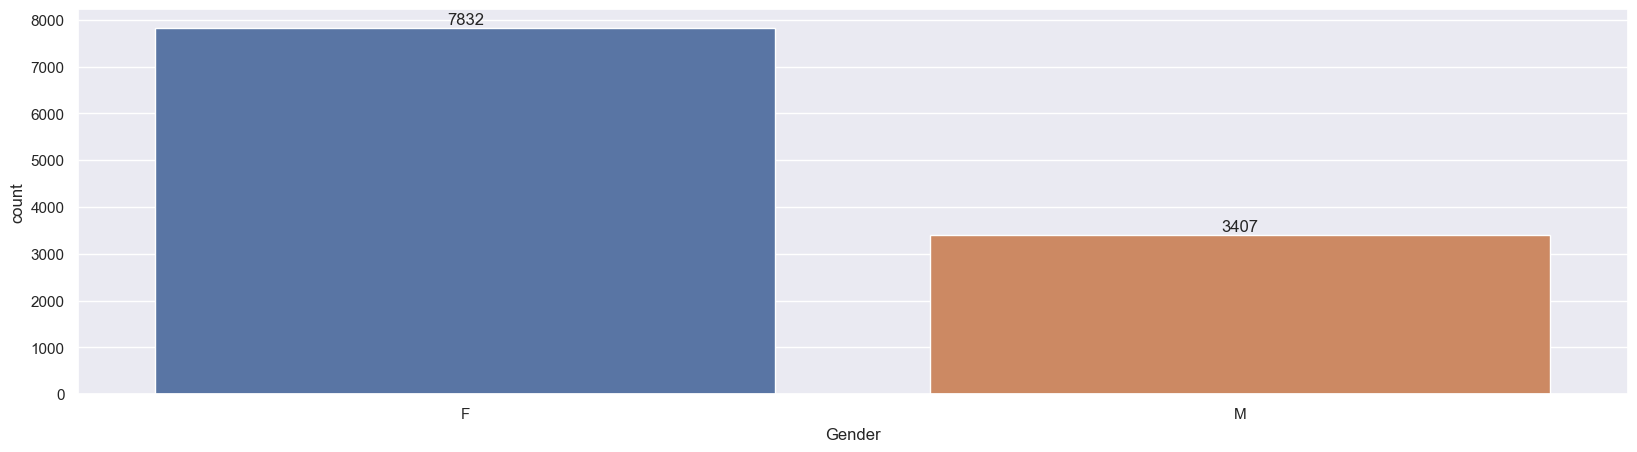

In [149]:
xx=sns.countplot(x="Gender", data=data)


for bars in xx.containers:
    xx.bar_label(bars)

In [50]:
sales_gender=data.groupby(["Gender"], as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

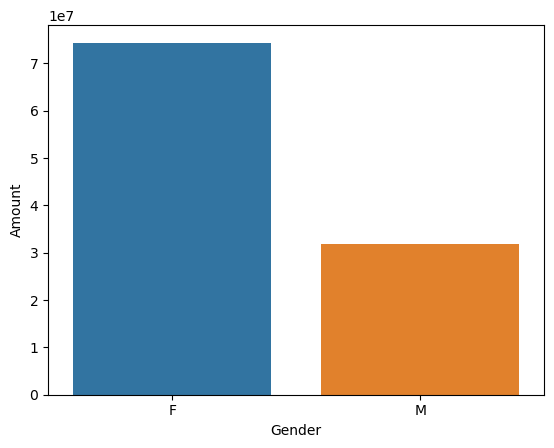

In [57]:
ss=sns.barplot(x="Gender",y="Amount", data=sales_gender)


# Age Group

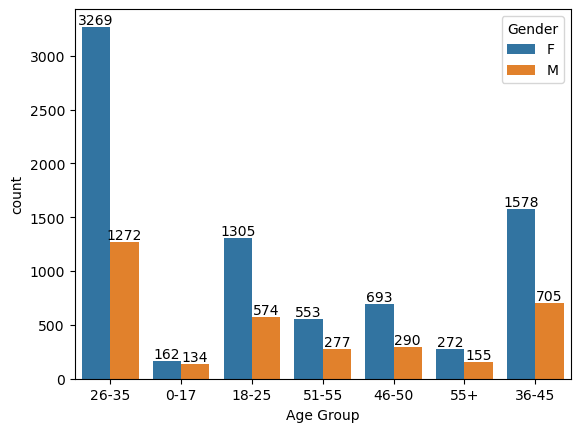

In [64]:
sn=sns.countplot(x="Age Group",hue="Gender",data=data)

for bars in sn.containers:
    sn.bar_label(bars)

In [69]:
# data.groupby(['Age Group'], as_index=False)['Gender'].sum().sort_values(by="Amount",ascending=False)
xs=data.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by="Amount", ascending=False)



<Axes: xlabel='Age Group', ylabel='Amount'>

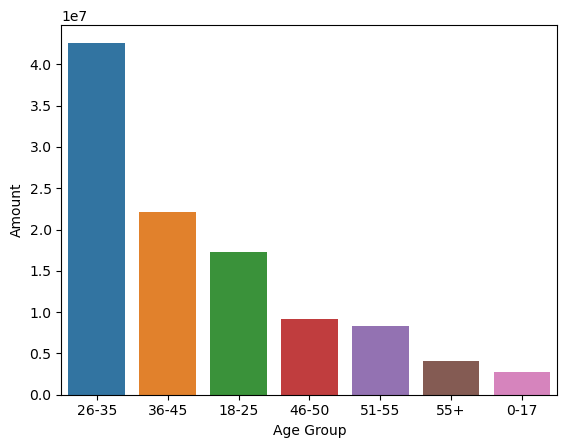

In [72]:
sns.barplot(x="Age Group",y="Amount",data=xs)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

# State

In [85]:
xx=data.groupby(["State"],as_index=False)["Orders"].sum().sort_values("Orders",ascending=False).head(10)

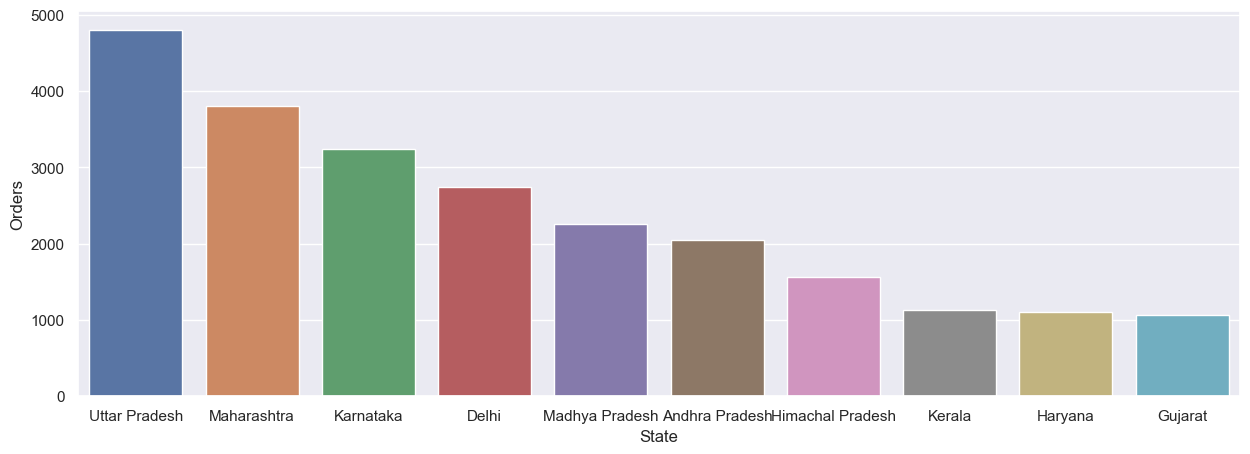

In [86]:
sns.barplot(x="State", y="Orders", data=xx)
sns.set(rc={'figure.figsize':(15,5)})


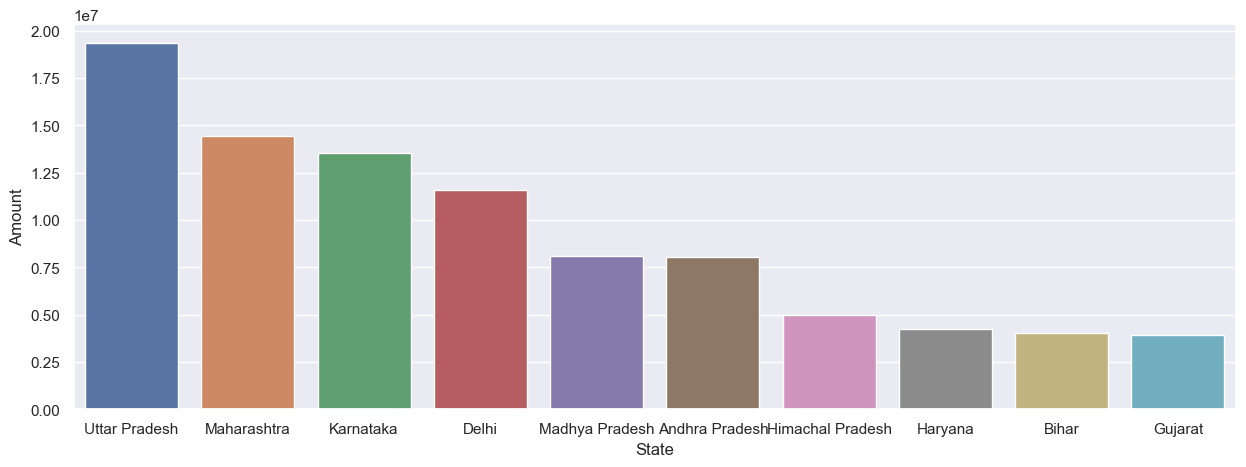

In [89]:
xx=data.groupby(["State"],as_index=False)["Amount"].sum().sort_values("Amount",ascending=False).head(10)



sns.barplot(x="State", y="Amount", data=xx)
sns.set(rc={'figure.figsize':(15,5)})


*From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*


# Marital Status

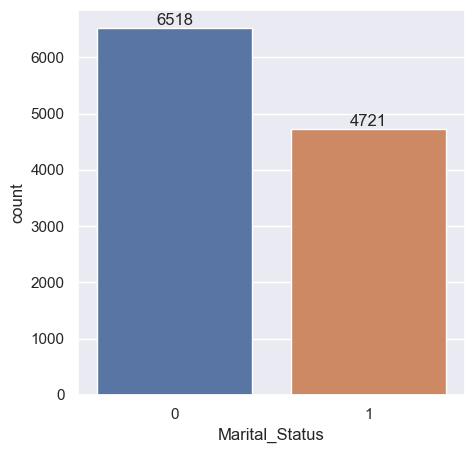

In [101]:
xn=sns.countplot(x="Marital_Status",data=data)


for bars in xn.containers:
    xn.bar_label(bars)


sns.set(rc={"figure.figsize": (5, 5)})


In [103]:
sn=data.groupby(["Marital_Status","Gender"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

<Axes: xlabel='Marital_Status', ylabel='Amount'>

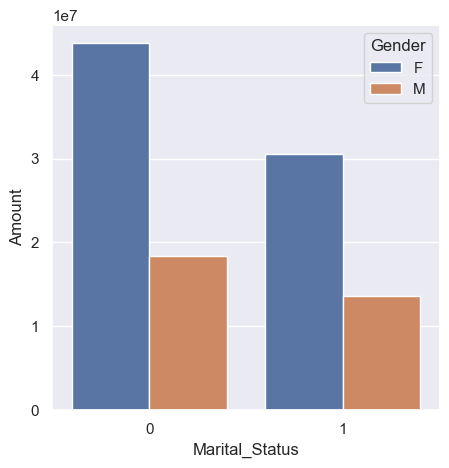

In [108]:
sns.barplot(x="Marital_Status",y="Amount",hue="Gender",data=sn)

*From above graphs we can see that most of the buyers are married (women) and they have high purchasing power*

# Occupation

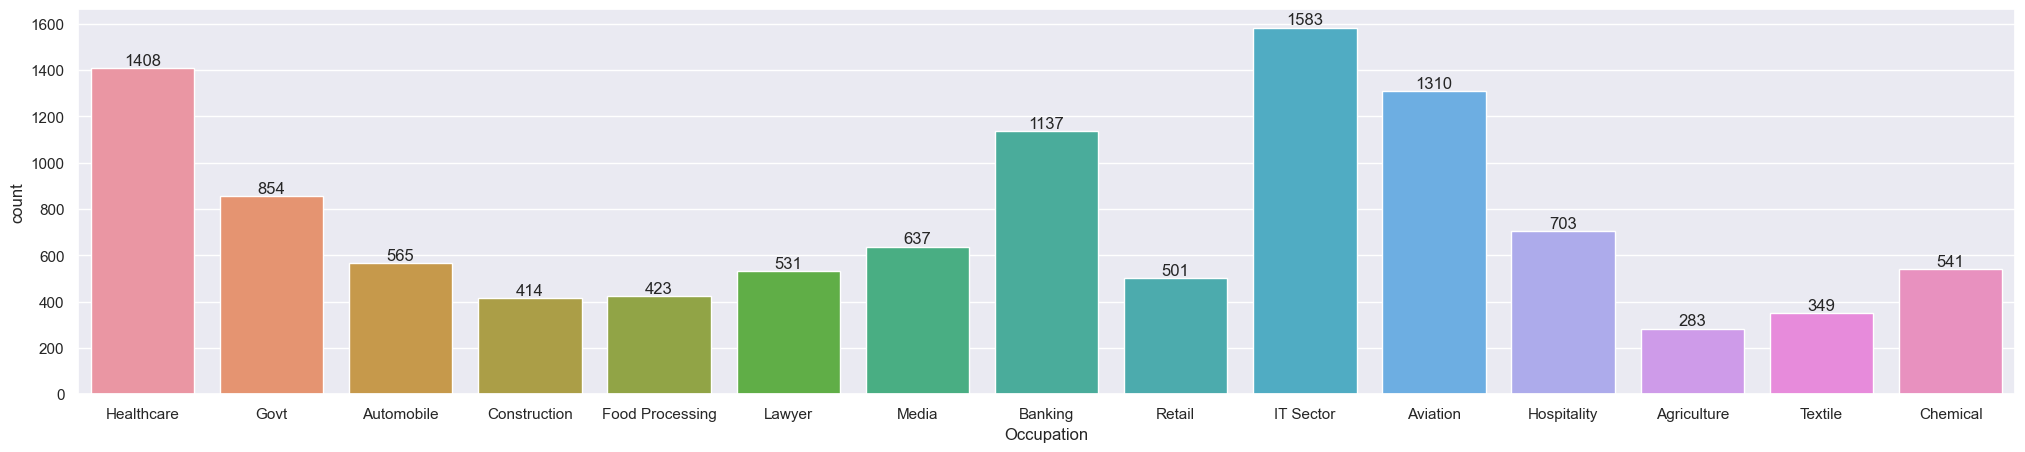

In [116]:
xs=sns.countplot(x="Occupation",data=data)
sns.set(rc={'figure.figsize':(25,5)})

for bars in xs.containers:
    xs.bar_label(bars)

In [119]:
occu=data.groupby(["Occupation"],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False)

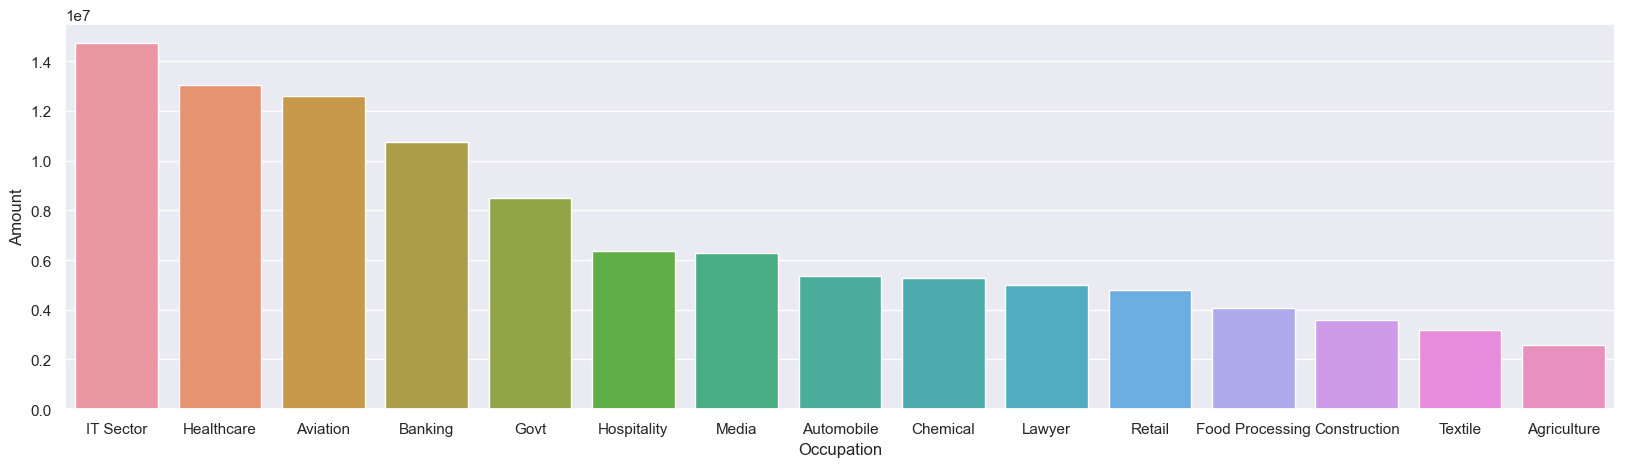

In [127]:
sns.barplot(x="Occupation",data=occu,y="Amount")
sns.set(rc={"figure.figsize":(20,5)})

*From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector*

# Product Category


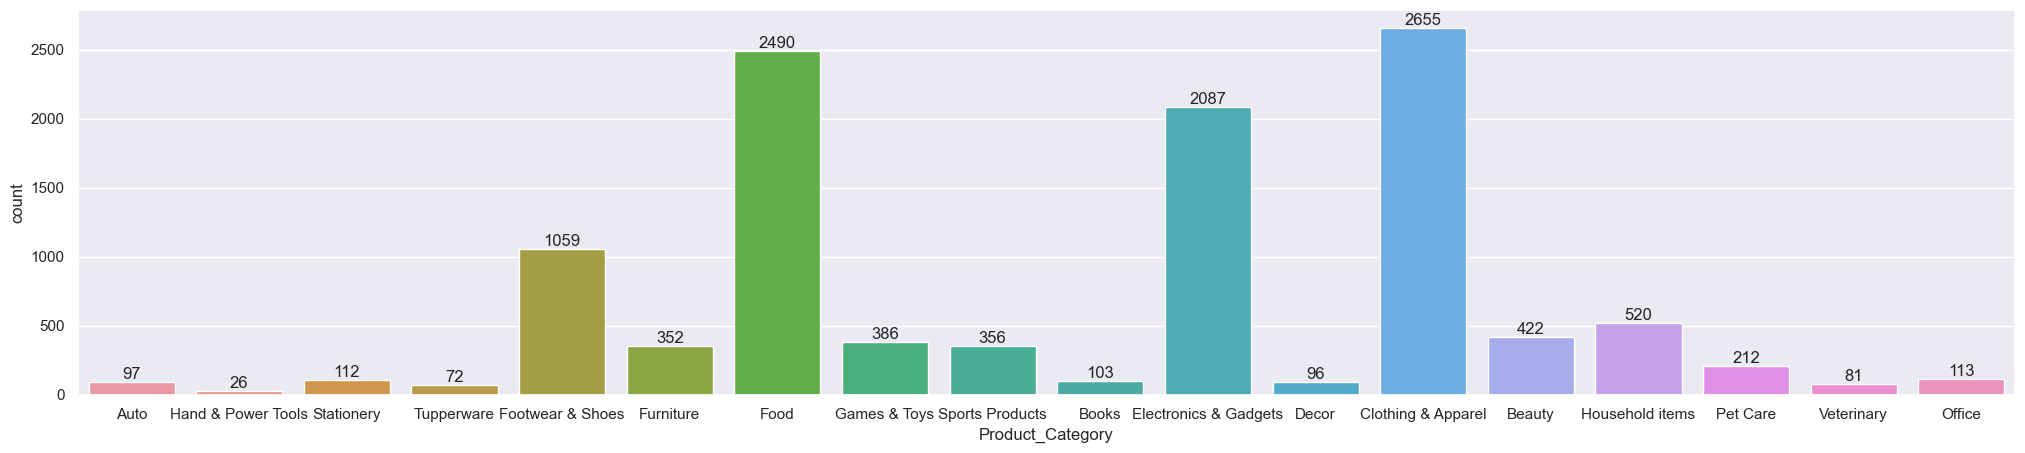

In [136]:
sn=sns.countplot(x="Product_Category",data=data)
for bars in sn.containers:
    sn.bar_label(bars)

sns.set(rc={"figure.figsize":(25,1)})

In [144]:
sn=data.groupby(['Product_Category'],as_index=False)["Amount"].sum().sort_values(by="Amount",ascending=False).head(10)

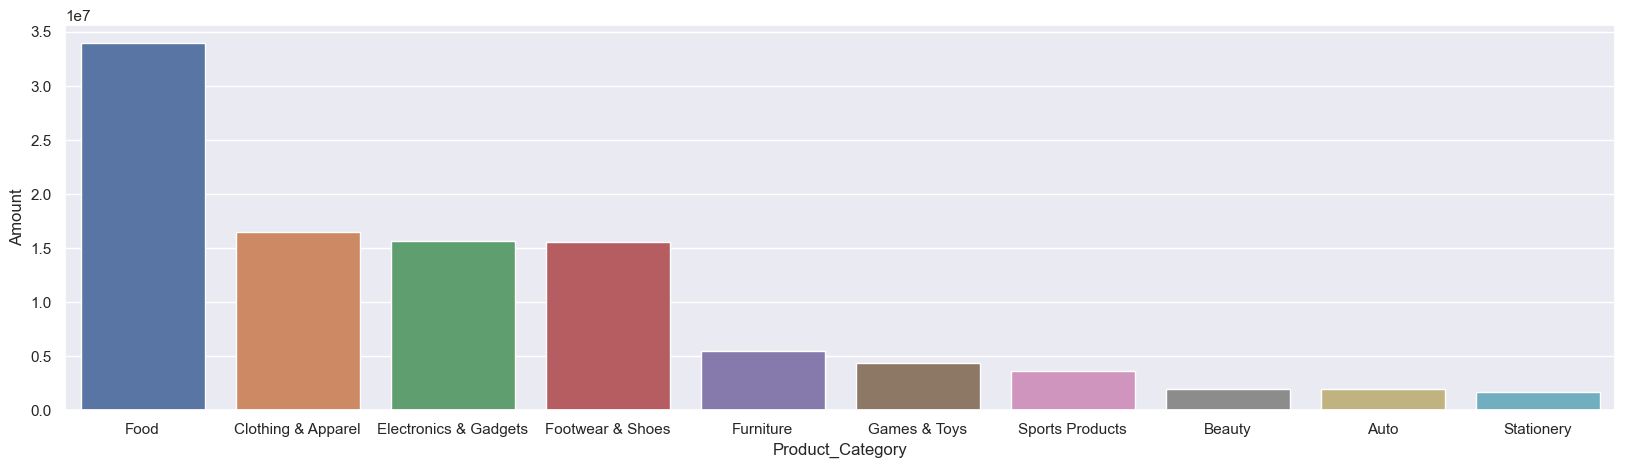

In [145]:
sns.barplot(x="Product_Category",data=sn,y="Amount")
sns.set(rc={"figure.figsize":(20,5)})

*From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category*

<Axes: xlabel='Product_ID', ylabel='Orders'>

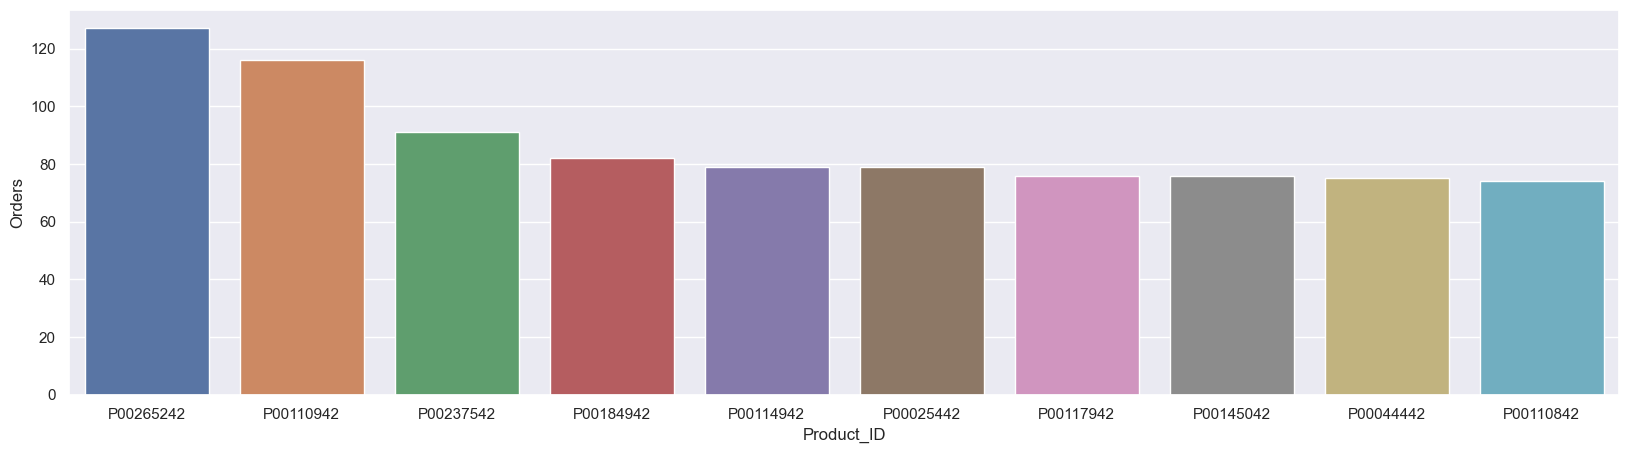

In [148]:
sales_state = data.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_ID',y= 'Orders')

# Conclusion

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*